In [3]:
from sklearn.metrics import balanced_accuracy_score, f1_score, classification_report, confusion_matrix, matthews_corrcoef, accuracy_score
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from scipy import stats
%matplotlib inline

def mcc_confidence_interval(mcc, sample_size, alpha=0.01):
    r_z = np.arctanh(mcc)
    se = 1/np.sqrt(sample_size-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return lo, hi



In [18]:
def print_results(y_true, y_pred, alpha=0.01):
    print(f'ACC:          {accuracy_score(y_pred, y_true):.4f}')
    print(f'F1-WEIGHTED:  {f1_score(y_pred, y_true, average="weighted"):.4f}')
    print(f'F1-MICRO:     {f1_score(y_pred, y_true, average="micro"):.4f}')
    print(f'F1-MACRO:     {f1_score(y_pred, y_true, average="macro"):.4f}')
    print(f'F1-BINARY:    {f1_score(y_pred, y_true, average="binary", pos_label="PROVIMENTO"):.4f}')
    print(f'BAC ADJUSTED: {balanced_accuracy_score(y_pred, y_true, adjusted=True):.4f}')
    print(f'MCC:        {matthews_corrcoef(y_pred, y_true):.4f} - CI at {1-alpha}: {mcc_confidence_interval(matthews_corrcoef(y_pred, y_true), len(y_true), alpha)}')
    print(f'\nClassification report: \n {classification_report(y_pred, y_true)}')
    print(f'\nConfusion matrix: \n {confusion_matrix(y_pred, y_true)}')

results_data = {}

In [19]:
pd.set_option('display.max_columns', 100)
pd.read_parquet('../data/humans_en.parquet')

,case_number,filing_date,defendant,defendant_normalized,requested_legal_fees_waiver,pay_order_issued,case_marked_as_closed,date_first_instance_ruling,filename_first_instance_ruling,date_appeal_panel_ruling,filename_appeal_panel_ruling,reporting_judge_appeal_panel,date_appeal_panel_session,judge_first_instance,requested_injunction,current_case_class,case_topic_code,case_topic_1st_level,case_topic_2nd_level,case_topic_3rd_level,number_lawyers_plaintiff,id_first_lawyer_plaintiff,full_text_first_instance_court_ruling,full_text_appeal_panel_ruling,number_words_first_instance_court_ruling,number_words_appeal_panel_ruling,number_conciliation_hearings,number_evidentiary_hearings,court_id,number_expert_witnesses,number_days_until_first_instance_court_ruling,label_appeal_panel_ruling,label_first_intance_ruling,plaintiff_in_error,preprocessed_full_text_first_instance_court_ruling,label,expert_guess,expert_id
0,0501562-20.2017.4.05.8308,2017-06-07 00:00:00,Caixa Econômica Federal - CEF (00.360.305/0001...,CEF,S,Não houve expedição de RPV/PRC,1.0,2017-06-08 16:06:23,Sentença - improcedente FGTS,2017-06-29 13:07:49,Acórdão - Acórdão FGTS-NP,FREDERICO AUGUSTO LEOPOLDINO KOEHLER,2017-06-29 10:00:00,THALYNNI MARIA DE LAVOR PASSOS,SEM PEDIDO LIMINAR,Procedimento do Juizado Especial Cível,10158,Direito Administrativo e outras matérias do Di...,Organização Político-administrativa / Administ...,FGTS/Fundo de Garantia por Tempo de Serviço,1,PE013762,"SENTENÇA I. Relatório Relatório dispensado, po...",EMENTA PROCESSUAL CIVIL. FGTS. INCIDÊNCIA DA T...,676,1510.0,0,0,8-PE,0,1.359294,NÃO PROVIMENTO,IMPROCEDENTE,AUTOR,relação à preliminar de suspensão suscitada pe...,NÃO PROVIMENTO,PROVIMENTO,13
1,0502784-23.2017.4.05.8308,2017-08-14 00:00:00,Caixa Econômica Federal - CEF (00.360.305/0001...,CEF,S,Não houve expedição de RPV/PRC,1.0,2017-08-22 09:22:35,Sentença - improcedente FGTS,2017-09-05 19:37:37,Acórdão - FGTS,Joaquim Lustosa Filho,2017-09-05 10:00:00,THALYNNI MARIA DE LAVOR PASSOS,SEM PEDIDO LIMINAR,Procedimento do Juizado Especial Cível,10158,Direito Administrativo e outras matérias do Di...,Organização Político-administrativa / Administ...,FGTS/Fundo de Garantia por Tempo de Serviço,1,PE013762,"SENTENÇA I. Relatório Relatório dispensado, po...",EMENTA PROCESSUAL CIVIL. FGTS. INCIDÊNCIA DA T...,683,1179.0,0,0,8-PE,0,7.835822,NÃO PROVIMENTO,IMPROCEDENTE,AUTOR,relação à preliminar de suspensão suscitada pe...,NÃO PROVIMENTO,NÃO PROVIMENTO,67
2,0513256-10.2017.4.05.8300,2017-08-09 00:00:00,Instituto Nacional do Seguro Social - INSS (29...,INSS,S,Não houve expedição de RPV/PRC,1.0,2017-08-10 17:50:40,Sentença - IPC – 3i/Art. 332 do CPC/Improcedentes,2017-09-16 10:41:48,Acórdão - Rev_np,FREDERICO AUGUSTO LEOPOLDINO KOEHLER,2017-09-15 09:30:00,DANIELA ZARZAR PEREIRA DE MELO QUEIROZ,SEM PEDIDO LIMINAR,Procedimento do Juizado Especial Cível,6138,Direito Previdenciário,"RMI - Renda Mensal Inicial, Reajustes e Revisõ...",Reajustes e Revisões Específicos,1,PE001532A,Processo no 0513256-10.2017.4.05.8300T Sentenç...,0519870-02.2015.4.05.8300 EMENTA PREVIDENCIÁRI...,1098,756.0,0,0,29-PE,0,1.237963,NÃO PROVIMENTO,IMPROCEDENTE,AUTOR,Trata-se de demanda que visa à revisão do valo...,NÃO PROVIMENTO,NÃO PROVIMENTO,73
3,0502691-48.2017.4.05.8312,2017-06-29 00:00:00,Instituto Nacional do Seguro Social - INSS (29...,INSS,S,Não houve expedição de RPV/PRC,1.0,2017-08-26 10:48:43,Sentença - IPC 3i,2017-09-16 17:13:19,Acórdão - IPC- 3i,Cláudio Kitner,2017-09-14 13:30:00,ETHEL FRANCISCO RIBEIRO,SEM PEDIDO LIMINAR,Procedimento do Juizado Especial Cível,6138,Direito Previdenciário,"RMI - Renda Mensal Inicial, Reajustes e Revisõ...",Reajustes e Revisões Específicos,1,PE001532A,"SENTENÇA 1.RELATÓRIO Dispensado o relatório, a...",EMENTA PREVIDENCIÁRIO. REAJUSTE DE BENEFÍCIOS....,474,509.0,0,0,34-PE,0,57.803970,NÃO PROVIMENTO,IMPROCEDENTE,AUTOR,Conforme posicionamento já firmado na jurispru...,NÃO PROVIMENTO,NÃO PROVIMENTO,73
4,0507792-17.2017.4.05.8102,2017-07-03 00:00:00,INSS 

In [20]:
dates_humans = pd.read_parquet('../data/humans_en.parquet', columns=['date_appeal_panel_ruling']).date_appeal_panel_ruling
dates_test = pd.read_parquet('../data/test_en.parquet', columns=['date_appeal_panel_ruling']).date_appeal_panel_ruling

state_humans = pd.read_parquet('../data/humans_en.parquet', columns=['court_id']).court_id.apply(lambda x: x.split('-')[1])
state_test = pd.read_parquet('../data/test_en.parquet', columns=['court_id']).court_id.apply(lambda x: x.split('-')[1])

# Humans experts

In [21]:
humans_results = pd.read_parquet('../data/humans_en.parquet')

In [22]:
humans_results.shape

(690, 38)

In [23]:
humans_results.head()

,case_number,filing_date,defendant,defendant_normalized,requested_legal_fees_waiver,pay_order_issued,case_marked_as_closed,date_first_instance_ruling,filename_first_instance_ruling,date_appeal_panel_ruling,filename_appeal_panel_ruling,reporting_judge_appeal_panel,date_appeal_panel_session,judge_first_instance,requested_injunction,current_case_class,case_topic_code,case_topic_1st_level,case_topic_2nd_level,case_topic_3rd_level,number_lawyers_plaintiff,id_first_lawyer_plaintiff,full_text_first_instance_court_ruling,full_text_appeal_panel_ruling,number_words_first_instance_court_ruling,number_words_appeal_panel_ruling,number_conciliation_hearings,number_evidentiary_hearings,court_id,number_expert_witnesses,number_days_until_first_instance_court_ruling,label_appeal_panel_ruling,label_first_intance_ruling,plaintiff_in_error,preprocessed_full_text_first_instance_court_ruling,label,expert_guess,expert_id
0,0501562-20.2017.4.05.8308,2017-06-07 00:00:00,Caixa Econômica Federal - CEF (00.360.305/0001...,CEF,S,Não houve expedição de RPV/PRC,1.0,2017-06-08 16:06:23,Sentença - improcedente FGTS,2017-06-29 13:07:49,Acórdão - Acórdão FGTS-NP,FREDERICO AUGUSTO LEOPOLDINO KOEHLER,2017-06-29 10:00:00,THALYNNI MARIA DE LAVOR PASSOS,SEM PEDIDO LIMINAR,Procedimento do Juizado Especial Cível,10158,Direito Administrativo e outras matérias do Di...,Organização Político-administrativa / Administ...,FGTS/Fundo de Garantia por Tempo de Serviço,1,PE013762,"SENTENÇA I. Relatório Relatório dispensado, po...",EMENTA PROCESSUAL CIVIL. FGTS. INCIDÊNCIA DA T...,676,1510.0,0,0,8-PE,0,1.359294,NÃO PROVIMENTO,IMPROCEDENTE,AUTOR,relação à preliminar de suspensão suscitada pe...,NÃO PROVIMENTO,PROVIMENTO,13
1,0502784-23.2017.4.05.8308,2017-08-14 00:00:00,Caixa Econômica Federal - CEF (00.360.305/0001...,CEF,S,Não houve expedição de RPV/PRC,1.0,2017-08-22 09:22:35,Sentença - improcedente FGTS,2017-09-05 19:37:37,Acórdão - FGTS,Joaquim Lustosa Filho,2017-09-05 10:00:00,THALYNNI MARIA DE LAVOR PASSOS,SEM PEDIDO LIMINAR,Procedimento do Juizado Especial Cível,10158,Direito Administrativo e outras matérias do Di...,Organização Político-administrativa / Administ...,FGTS/Fundo de Garantia por Tempo de Serviço,1,PE013762,"SENTENÇA I. Relatório Relatório dispensado, po...",EMENTA PROCESSUAL CIVIL. FGTS. INCIDÊNCIA DA T...,683,1179.0,0,0,8-PE,0,7.835822,NÃO PROVIMENTO,IMPROCEDENTE,AUTOR,relação à preliminar de suspensão suscitada pe...,NÃO PROVIMENTO,NÃO PROVIMENTO,67
2,0513256-10.2017.4.05.8300,2017-08-09 00:00:00,Instituto Nacional do Seguro Social - INSS (29...,INSS,S,Não houve expedição de RPV/PRC,1.0,2017-08-10 17:50:40,Sentença - IPC – 3i/Art. 332 do CPC/Improcedentes,2017-09-16 10:41:48,Acórdão - Rev_np,FREDERICO AUGUSTO LEOPOLDINO KOEHLER,2017-09-15 09:30:00,DANIELA ZARZAR PEREIRA DE MELO QUEIROZ,SEM PEDIDO LIMINAR,Procedimento do Juizado Especial Cível,6138,Direito Previdenciário,"RMI - Renda Mensal Inicial, Reajustes e Revisõ...",Reajustes e Revisões Específicos,1,PE001532A,Processo no 0513256-10.2017.4.05.8300T Sentenç...,0519870-02.2015.4.05.8300 EMENTA PREVIDENCIÁRI...,1098,756.0,0,0,29-PE,0,1.237963,NÃO PROVIMENTO,IMPROCEDENTE,AUTOR,Trata-se de demanda que visa à revisão do valo...,NÃO PROVIMENTO,NÃO PROVIMENTO,73
3,0502691-48.2017.4.05.8312,2017-06-29 00:00:00,Instituto Nacional do Seguro Social - INSS (29...,INSS,S,Não houve expedição de RPV/PRC,1.0,2017-08-26 10:48:43,Sentença - IPC 3i,2017-09-16 17:13:19,Acórdão - IPC- 3i,Cláudio Kitner,2017-09-14 13:30:00,ETHEL FRANCISCO RIBEIRO,SEM PEDIDO LIMINAR,Procedimento do Juizado Especial Cível,6138,Direito Previdenciário,"RMI - Renda Mensal Inicial, Reajustes e Revisõ...",Reajustes e Revisões Específicos,1,PE001532A,"SENTENÇA 1.RELATÓRIO Dispensado o relatório, a...",EMENTA PREVIDENCIÁRIO. REAJUSTE DE BENEFÍCIOS....,474,509.0,0,0,34-PE,0,57.803970,NÃO PROVIMENTO,IMPROCEDENTE,AUTOR,Conforme posicionamento já firmado na jurispru...,NÃO PROVIMENTO,NÃO PROVIMENTO,73
4,0507792-17.2017.4.05.8102,2017-07-03 00:00:00,INSS 

In [24]:
y_true = humans_results.label
y_pred = humans_results.expert_guess

print('Human experts performance on the human experts dataset:')
print_results(y_true, y_pred)
print('\n'*3)


Human experts performance on the human experts dataset:
ACC:          0.7580
F1-WEIGHTED:  0.7885
F1-MICRO:     0.7580
F1-MACRO:     0.5501
F1-BINARY:    0.2443
BAC ADJUSTED: 0.1631
MCC:        0.1253 - CI at 0.99: (0.027698574597829505, 0.22056858952041936)

Classification report: 
                 precision    recall  f1-score   support

NÃO PROVIMENTO       0.91      0.81      0.86       614
    PROVIMENTO       0.19      0.36      0.24        76

      accuracy                           0.76       690
     macro avg       0.55      0.58      0.55       690
  weighted avg       0.83      0.76      0.79       690


Confusion matrix: 
 [[496 118]
 [ 49  27]]






# ULMFiT forward

In [25]:
MODEL = 'ULMFiT-fwd'

humans = pd.read_csv(f'./predictions/{MODEL}-humans.csv')
test = pd.read_csv(f'./predictions/{MODEL}-test.csv')

humans['date_appeal_panel_ruling'] = dates_humans
test['date_appeal_panel_ruling'] = dates_test

humans['state'] = state_humans
test['state'] = state_test

In [26]:
humans.head()

,y_pred,y_true,model,ds_type,date_appeal_panel_ruling,state
0,NÃO PROVIMENTO,NÃO PROVIMENTO,ULMFiT-fwd,humans,2017-06-29 13:07:49,PE
1,NÃO PROVIMENTO,NÃO PROVIMENTO,ULMFiT-fwd,humans,2017-09-05 19:37:37,PE
2,NÃO PROVIMENTO,NÃO PROVIMENTO,ULMFiT-fwd,humans,2017-09-16 10:41:48,PE
3,NÃO PROVIMENTO,NÃO PROVIMENTO,ULMFiT-fwd,humans,2017-09-16 17:13:19,PE
4,NÃO PROVIMENTO,NÃO PROVIMENTO,ULMFiT-fwd,humans,2017-09-25 14:52:05,CE


In [27]:
test.head()

,y_pred,y_true,model,ds_type,date_appeal_panel_ruling,state
0,NÃO PROVIMENTO,NÃO PROVIMENTO,ULMFiT-fwd,test,2018-03-26 17:00:42,CE
1,NÃO PROVIMENTO,NÃO PROVIMENTO,ULMFiT-fwd,test,2018-03-26 17:02:04,CE
2,NÃO PROVIMENTO,NÃO PROVIMENTO,ULMFiT-fwd,test,2018-03-26 17:02:04,CE
3,NÃO PROVIMENTO,NÃO PROVIMENTO,ULMFiT-fwd,test,2018-03-26 17:02:04,CE
4,NÃO PROVIMENTO,NÃO PROVIMENTO,ULMFiT-fwd,test,2018-03-26 17:05:45,CE


In [28]:
humans.shape, test.shape

((690, 6), (76299, 6))

In [29]:

print('Deep Learning performance on the test dataset:')
print_results(test.y_true, test.y_pred)
print('\n'*3)

print('Deep Learning performance on the human experts dataset:')
print_results(humans.y_true, humans.y_pred)
print('\n'*3)


Deep Learning performance on the test dataset:
ACC:          0.7219
F1-WEIGHTED:  0.7051
F1-MICRO:     0.7219
F1-MACRO:     0.6512
F1-BINARY:    0.4940
BAC ADJUSTED: 0.2862
MCC:        0.3238 - CI at 0.99: (0.31538557841493287, 0.332081028799171)

Classification report: 
                 precision    recall  f1-score   support

NÃO PROVIMENTO       0.75      0.87      0.81     51252
    PROVIMENTO       0.61      0.41      0.49     25047

      accuracy                           0.72     76299
     macro avg       0.68      0.64      0.65     76299
  weighted avg       0.71      0.72      0.71     76299


Confusion matrix: 
 [[44727  6525]
 [14690 10357]]




Deep Learning performance on the human experts dataset:
ACC:          0.7087
F1-WEIGHTED:  0.6892
F1-MICRO:     0.7087
F1-MACRO:     0.6269
F1-BINARY:    0.4523
BAC ADJUSTED: 0.2414
MCC:        0.2768 - CI at 0.99: (0.18381208303632, 0.36485343317224694)

Classification report: 
                 precision    recall  f1-score   sup

In [30]:
results_data[f'{MODEL}-humans'] = humans.copy() 
results_data[f'{MODEL}-test'] = test.copy() 

# ULMFiT backward

In [31]:
MODEL = 'ULMFiT-bwd'

humans = pd.read_csv(f'./predictions/{MODEL}-humans.csv')
test = pd.read_csv(f'./predictions/{MODEL}-test.csv')

humans['date_appeal_panel_ruling'] = dates_humans
test['date_appeal_panel_ruling'] = dates_test

humans['state'] = state_humans
test['state'] = state_test

In [32]:
humans.head()

,y_pred,y_true,model,ds_type,date_appeal_panel_ruling,state
0,NÃO PROVIMENTO,NÃO PROVIMENTO,ULMFiT-bwd,humans,2017-06-29 13:07:49,PE
1,NÃO PROVIMENTO,NÃO PROVIMENTO,ULMFiT-bwd,humans,2017-09-05 19:37:37,PE
2,NÃO PROVIMENTO,NÃO PROVIMENTO,ULMFiT-bwd,humans,2017-09-16 10:41:48,PE
3,NÃO PROVIMENTO,NÃO PROVIMENTO,ULMFiT-bwd,humans,2017-09-16 17:13:19,PE
4,NÃO PROVIMENTO,NÃO PROVIMENTO,ULMFiT-bwd,humans,2017-09-25 14:52:05,CE


In [33]:
test.head()

,y_pred,y_true,model,ds_type,date_appeal_panel_ruling,state
0,NÃO PROVIMENTO,NÃO PROVIMENTO,ULMFiT-bwd,test,2018-03-26 17:00:42,CE
1,NÃO PROVIMENTO,NÃO PROVIMENTO,ULMFiT-bwd,test,2018-03-26 17:02:04,CE
2,NÃO PROVIMENTO,NÃO PROVIMENTO,ULMFiT-bwd,test,2018-03-26 17:02:04,CE
3,NÃO PROVIMENTO,NÃO PROVIMENTO,ULMFiT-bwd,test,2018-03-26 17:02:04,CE
4,NÃO PROVIMENTO,NÃO PROVIMENTO,ULMFiT-bwd,test,2018-03-26 17:05:45,CE


In [34]:
humans.shape, test.shape

((690, 6), (76299, 6))

In [35]:

print('Deep Learning performance on the test dataset:')
print_results(test.y_true, test.y_pred)
print('\n'*3)

print('Deep Learning performance on the human experts dataset:')
print_results(humans.y_true, humans.y_pred)
print('\n'*3)


Deep Learning performance on the test dataset:
ACC:          0.7138
F1-WEIGHTED:  0.6929
F1-MICRO:     0.7138
F1-MACRO:     0.6569
F1-BINARY:    0.5172
BAC ADJUSTED: 0.3044
MCC:        0.3544 - CI at 0.99: (0.3461726370925102, 0.3624811760518379)

Classification report: 
                 precision    recall  f1-score   support

NÃO PROVIMENTO       0.72      0.89      0.80     47964
    PROVIMENTO       0.69      0.41      0.52     28335

      accuracy                           0.71     76299
     macro avg       0.71      0.65      0.66     76299
  weighted avg       0.71      0.71      0.69     76299


Confusion matrix: 
 [[42774  5190]
 [16643 11692]]




Deep Learning performance on the human experts dataset:
ACC:          0.7159
F1-WEIGHTED:  0.6930
F1-MICRO:     0.7159
F1-MACRO:     0.6540
F1-BINARY:    0.5075
BAC ADJUSTED: 0.2985
MCC:        0.3531 - CI at 0.99: (0.26428142698024165, 0.4359777671119444)

Classification report: 
                 precision    recall  f1-score   s

In [36]:
results_data[f'{MODEL}-humans'] = humans.copy() 
results_data[f'{MODEL}-test'] = test.copy() 

# ULMFiT bidir

In [37]:
MODEL = 'ULMFiT-bidir'

humans = pd.read_csv(f'./predictions/{MODEL}-humans.csv')
test = pd.read_csv(f'./predictions/{MODEL}-test.csv')

humans['date_appeal_panel_ruling'] = dates_humans
test['date_appeal_panel_ruling'] = dates_test

humans['state'] = state_humans
test['state'] = state_test

In [38]:
humans.head()

,y_pred,y_true,model,ds_type,date_appeal_panel_ruling,state
0,NÃO PROVIMENTO,NÃO PROVIMENTO,ULMFiT-bidir,humans,2017-06-29 13:07:49,PE
1,NÃO PROVIMENTO,NÃO PROVIMENTO,ULMFiT-bidir,humans,2017-09-05 19:37:37,PE
2,NÃO PROVIMENTO,NÃO PROVIMENTO,ULMFiT-bidir,humans,2017-09-16 10:41:48,PE
3,NÃO PROVIMENTO,NÃO PROVIMENTO,ULMFiT-bidir,humans,2017-09-16 17:13:19,PE
4,NÃO PROVIMENTO,NÃO PROVIMENTO,ULMFiT-bidir,humans,2017-09-25 14:52:05,CE


In [39]:
test.head()

,y_pred,y_true,model,ds_type,date_appeal_panel_ruling,state
0,NÃO PROVIMENTO,NÃO PROVIMENTO,ULMFiT-bidir,test,2018-03-26 17:00:42,CE
1,NÃO PROVIMENTO,NÃO PROVIMENTO,ULMFiT-bidir,test,2018-03-26 17:02:04,CE
2,NÃO PROVIMENTO,NÃO PROVIMENTO,ULMFiT-bidir,test,2018-03-26 17:02:04,CE
3,NÃO PROVIMENTO,NÃO PROVIMENTO,ULMFiT-bidir,test,2018-03-26 17:02:04,CE
4,NÃO PROVIMENTO,NÃO PROVIMENTO,ULMFiT-bidir,test,2018-03-26 17:05:45,CE


In [40]:
humans.shape, test.shape

((690, 6), (76299, 6))

In [41]:

print('Deep Learning performance on the test dataset:')
print_results(test.y_true, test.y_pred)
print('\n'*3)

print('Deep Learning performance on the human experts dataset:')
print_results(humans.y_true, humans.y_pred)
print('\n'*3)


Deep Learning performance on the test dataset:
ACC:          0.7293
F1-WEIGHTED:  0.7110
F1-MICRO:     0.7293
F1-MACRO:     0.6686
F1-BINARY:    0.5268
BAC ADJUSTED: 0.3208
MCC:        0.3688 - CI at 0.99: (0.3607462422982596, 0.3768595380970692)

Classification report: 
                 precision    recall  f1-score   support

NÃO PROVIMENTO       0.74      0.89      0.81     49540
    PROVIMENTO       0.68      0.43      0.53     26759

      accuracy                           0.73     76299
     macro avg       0.71      0.66      0.67     76299
  weighted avg       0.72      0.73      0.71     76299


Confusion matrix: 
 [[44153  5387]
 [15264 11495]]




Deep Learning performance on the human experts dataset:
ACC:          0.7203
F1-WEIGHTED:  0.6994
F1-MICRO:     0.7203
F1-MACRO:     0.6513
F1-BINARY:    0.4961
BAC ADJUSTED: 0.2885
MCC:        0.3367 - CI at 0.99: (0.24683367646317744, 0.42073622617621015)

Classification report: 
                 precision    recall  f1-score   

In [42]:
results_data[f'{MODEL}-humans'] = humans.copy() 
results_data[f'{MODEL}-test'] = test.copy() 

# BERT_LSTM

In [43]:
MODEL = 'BERT_LSTM'

humans = pd.read_csv(f'./predictions/{MODEL}-humans.csv')
test = pd.read_csv(f'./predictions/{MODEL}-test.csv')

humans['date_appeal_panel_ruling'] = dates_humans
test['date_appeal_panel_ruling'] = dates_test

humans['state'] = state_humans
test['state'] = state_test

In [44]:
humans.head()

,y_pred,y_true,model,ds_type,date_appeal_panel_ruling,state
0,NÃO PROVIMENTO,NÃO PROVIMENTO,BERT_LSTM,humans,2017-06-29 13:07:49,PE
1,NÃO PROVIMENTO,NÃO PROVIMENTO,BERT_LSTM,humans,2017-09-05 19:37:37,PE
2,NÃO PROVIMENTO,NÃO PROVIMENTO,BERT_LSTM,humans,2017-09-16 10:41:48,PE
3,NÃO PROVIMENTO,NÃO PROVIMENTO,BERT_LSTM,humans,2017-09-16 17:13:19,PE
4,NÃO PROVIMENTO,NÃO PROVIMENTO,BERT_LSTM,humans,2017-09-25 14:52:05,CE


In [45]:
test.head()

,y_pred,y_true,model,ds_type,date_appeal_panel_ruling,state
0,NÃO PROVIMENTO,NÃO PROVIMENTO,BERT_LSTM,test,2018-03-26 17:00:42,CE
1,PROVIMENTO,NÃO PROVIMENTO,BERT_LSTM,test,2018-03-26 17:02:04,CE
2,NÃO PROVIMENTO,NÃO PROVIMENTO,BERT_LSTM,test,2018-03-26 17:02:04,CE
3,NÃO PROVIMENTO,NÃO PROVIMENTO,BERT_LSTM,test,2018-03-26 17:02:04,CE
4,NÃO PROVIMENTO,NÃO PROVIMENTO,BERT_LSTM,test,2018-03-26 17:05:45,CE


In [46]:
humans.shape, test.shape

((690, 6), (76299, 6))

In [47]:

print('Deep Learning performance on the test dataset:')
print_results(test.y_true, test.y_pred)
print('\n'*3)

print('Deep Learning performance on the human experts dataset:')
print_results(humans.y_true, humans.y_pred)
print('\n'*3)


Deep Learning performance on the test dataset:
ACC:          0.6939
F1-WEIGHTED:  0.6701
F1-MICRO:     0.6939
F1-MACRO:     0.6408
F1-BINARY:    0.5027
BAC ADJUSTED: 0.2825
MCC:        0.3326 - CI at 0.99: (0.3242609396955646, 0.34084840996611737)

Classification report: 
                 precision    recall  f1-score   support

NÃO PROVIMENTO       0.69      0.89      0.78     46227
    PROVIMENTO       0.70      0.39      0.50     30072

      accuracy                           0.69     76299
     macro avg       0.70      0.64      0.64     76299
  weighted avg       0.70      0.69      0.67     76299


Confusion matrix: 
 [[41146  5081]
 [18271 11801]]




Deep Learning performance on the human experts dataset:
ACC:          0.6797
F1-WEIGHTED:  0.6515
F1-MICRO:     0.6797
F1-MACRO:     0.6243
F1-BINARY:    0.4800
BAC ADJUSTED: 0.2594
MCC:        0.3127 - CI at 0.99: (0.2214841017610263, 0.3984156899980979)

Classification report: 
                 precision    recall  f1-score   s

In [48]:
results_data[f'{MODEL}-humans'] = humans.copy() 
results_data[f'{MODEL}-test'] = test.copy() 

# BigBird

In [49]:
MODEL = 'BigBird'

humans = pd.read_csv(f'./predictions/{MODEL}-humans.csv')
test = pd.read_csv(f'./predictions/{MODEL}-test.csv')

humans['date_appeal_panel_ruling'] = dates_humans
test['date_appeal_panel_ruling'] = dates_test

humans['state'] = state_humans
test['state'] = state_test

In [50]:
humans.head()

,y_pred,y_true,model,ds_type,date_appeal_panel_ruling,state
0,NÃO PROVIMENTO,NÃO PROVIMENTO,BigBird,humans,2017-06-29 13:07:49,PE
1,NÃO PROVIMENTO,NÃO PROVIMENTO,BigBird,humans,2017-09-05 19:37:37,PE
2,NÃO PROVIMENTO,NÃO PROVIMENTO,BigBird,humans,2017-09-16 10:41:48,PE
3,NÃO PROVIMENTO,NÃO PROVIMENTO,BigBird,humans,2017-09-16 17:13:19,PE
4,NÃO PROVIMENTO,NÃO PROVIMENTO,BigBird,humans,2017-09-25 14:52:05,CE


In [51]:
test.head()

,y_pred,y_true,model,ds_type,date_appeal_panel_ruling,state
0,NÃO PROVIMENTO,NÃO PROVIMENTO,BigBird,test,2018-03-26 17:00:42,CE
1,NÃO PROVIMENTO,NÃO PROVIMENTO,BigBird,test,2018-03-26 17:02:04,CE
2,NÃO PROVIMENTO,NÃO PROVIMENTO,BigBird,test,2018-03-26 17:02:04,CE
3,NÃO PROVIMENTO,NÃO PROVIMENTO,BigBird,test,2018-03-26 17:02:04,CE
4,NÃO PROVIMENTO,NÃO PROVIMENTO,BigBird,test,2018-03-26 17:05:45,CE


In [52]:
humans.shape, test.shape

((690, 6), (76299, 6))

In [53]:

print('Deep Learning performance on the test dataset:')
print_results(test.y_true, test.y_pred)
print('\n'*3)

print('Deep Learning performance on the human experts dataset:')
print_results(humans.y_true, humans.y_pred)
print('\n'*3)


Deep Learning performance on the test dataset:
ACC:          0.5292
F1-WEIGHTED:  0.5009
F1-MICRO:     0.5292
F1-MACRO:     0.5196
F1-BINARY:    0.4516
BAC ADJUSTED: 0.2287
MCC:        0.2649 - CI at 0.99: (0.2561654395283412, 0.2735074439826271)

Classification report: 
                 precision    recall  f1-score   support

NÃO PROVIMENTO       0.43      0.92      0.59     27673
    PROVIMENTO       0.88      0.30      0.45     48626

      accuracy                           0.53     76299
     macro avg       0.65      0.61      0.52     76299
  weighted avg       0.71      0.53      0.50     76299


Confusion matrix: 
 [[25583  2090]
 [33834 14792]]




Deep Learning performance on the human experts dataset:
ACC:          0.4609
F1-WEIGHTED:  0.4344
F1-MICRO:     0.4609
F1-MACRO:     0.4553
F1-BINARY:    0.4000
BAC ADJUSTED: 0.1634
MCC:        0.1857 - CI at 0.99: (0.08939580936224754, 0.278617997313082)

Classification report: 
                 precision    recall  f1-score   su

In [54]:
results_data[f'{MODEL}-humans'] = humans.copy() 
results_data[f'{MODEL}-test'] = test.copy() 

In [55]:
def calculate_mcc_over_resample(dataframe):
    y_true = dataframe.y_true.values
    y_pred = dataframe.y_pred.values
    return matthews_corrcoef(y_true, y_pred)


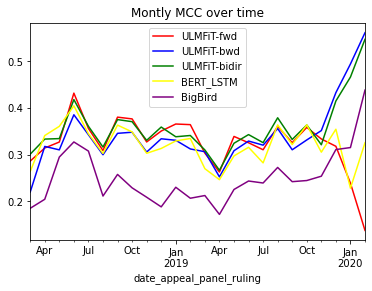

In [56]:
ax = None
colors = {
    'ULMFiT-fwd-test': 'red',
    'ULMFiT-bwd-test': 'blue',
    'ULMFiT-bidir-test': 'green',
    'BERT_LSTM-test': 'yellow',
    'BigBird-test': 'purple',
}

for k, v in results_data.items():
    if k.endswith('-test'):
        #print(k)
        df = v.copy()
        df.set_index('date_appeal_panel_ruling', inplace=True)
        df = df[df.index <= datetime(2020, 3, 1)]
        if ax is None:
            ax = df.resample('1M').apply(calculate_mcc_over_resample).plot(color=colors[k], label=k.split('-test')[0])
        else:
            df.resample('1M').apply(calculate_mcc_over_resample).plot(color=colors[k], label=k.split('-test')[0])
plt.legend()
plt.title('Montly MCC over time')
plt.show()



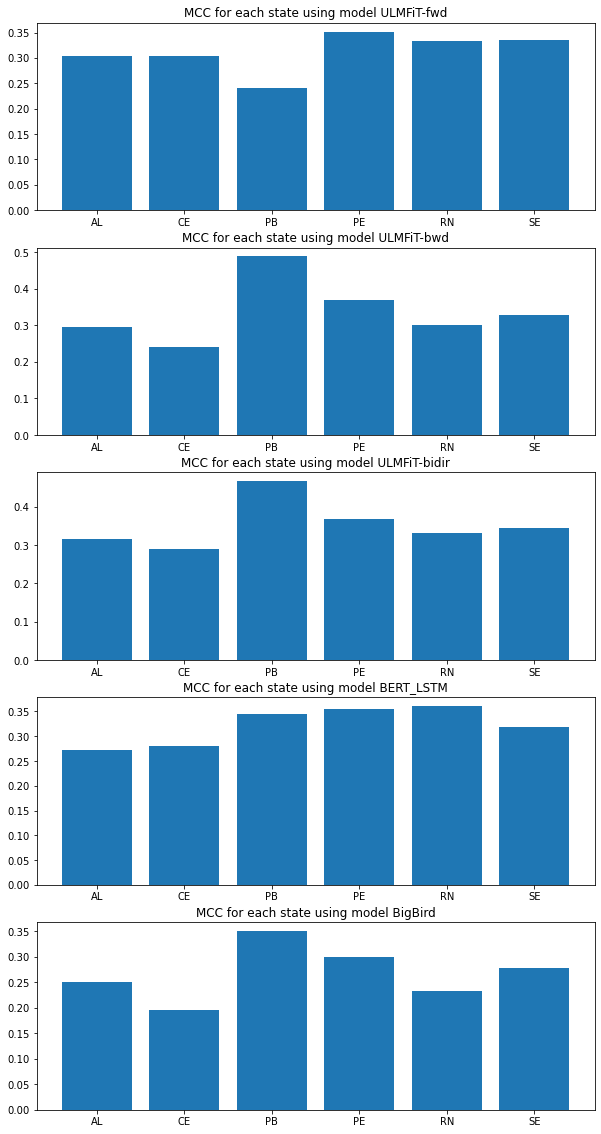

In [57]:
ax = None
colors = {
    'ULMFiT-fwd-test': 'red',
    'ULMFiT-bwd-test': 'blue',
    'ULMFiT-bidir-test': 'green',
    'BERT_LSTM-test': 'yellow',
    'BigBird-test': 'purple',
}

fig, axis = plt.subplots(5,1, figsize=(10,20))

plot_idx = 0
for k, v in results_data.items():
    if k.endswith('-test'):
        #print(k)
        df = v.copy()
        ax = axis[plot_idx]
        plot_idx += 1
        mcc_per_state = df.groupby('state').apply(calculate_mcc_over_resample)
        ax.bar(mcc_per_state.index, mcc_per_state.values)#, color=colors[k])
        ax.set_title(f"MCC for each state using model {k.split('-test')[0]}")
        ax.y_lim=1.0
plt.show()



In [58]:
ax = None
colors = {
    'ULMFiT-fwd-test': 'red',
    'ULMFiT-bwd-test': 'blue',
    'ULMFiT-bidir-test': 'green',
    'BERT_LSTM-test': 'yellow',
    'BigBird-test': 'purple',
}

tmp_df = pd.concat([results_data[i] for i in results_data.keys() if 'test' in i])
tmp_df.set_index('date_appeal_panel_ruling', inplace=True)

ts = tmp_df.groupby('model').resample('1M').apply(calculate_mcc_over_resample)

ts


date_appeal_panel_ruling,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30
model,,,,,,,,,,,,,,,,,,,,,,,,,,
BERT_LSTM,0.263873,0.340834,0.360633,0.404509,0.344893,0.302491,0.363224,0.348683,0.302832,0.313151,0.329344,0.334534,0.269830,0.246280,0.297175,0.315673,0.282253,0.363755,0.321648,0.363827,0.305227,0.354390,0.227939,0.325490,0.349885,0.781736
BigBird,0.184915,0.204265,0.294736,0.327110,0.307545,0.211201,0.257517,0.228781,0.208674,0.188001,0.230035,0.206490,0.212273,0.171843,0.225278,0.243396,0.239142,0.272494,0.242001,0.244429,0.253708,0.310822,0.315117,0.438297,0.346444,1.000000
ULMFiT-bidir,0.300867,0.333275,0.334292,0.417930,0.360723,0.316156,0.375047,0.370564,0.330521,0.359057,0.338254,0.340959,0.309925,0.266436,0.324335,0.342884,0.325625,0.378923,0.332429,0.363378,0.321134,0.414924,0.466200,0.547077,0.481176,1.000000
ULMFiT-bwd,0.219757,0.317537,0.310169,0.385426,0.342587,0.299744,0.345586,0.347981,0.305438,0.333911,0.330716,0.312108,0.306188,0.252277,0.308321,0.329047,0.320266,0.355715,0.310341,0.331413,0.351455,0.432808,0.494201,0.561190,0.474174,0.781736
ULMFiT-fwd,0.286087,0.314103,0.326973,0.431759,0.356148,0.308634,0.380263,0.376540,0.327090,0.350487,0.365558,0.364228,0.303163,0.262663,0.338948,0.325405,0.310391,0.360522,0.325529,0.358277,0.333511,0.317822,0.238829,0.137535,0.084824,0.213201


In [59]:
tmp_df

,y_pred,y_true,model,ds_type,state
date_appeal_panel_ruling,,,,,
2018-03-26 17:00:42,NÃO PROVIMENTO,NÃO PROVIMENTO,ULMFiT-fwd,test,CE
2018-03-26 17:02:04,NÃO PROVIMENTO,NÃO PROVIMENTO,ULMFiT-fwd,test,CE
2018-03-26 17:02:04,NÃO PROVIMENTO,NÃO PROVIMENTO,ULMFiT-fwd,test,CE
2018-03-26 17:02:04,NÃO PROVIMENTO,NÃO PROVIMENTO,ULMFiT-fwd,test,CE
2018-03-26 17:05:45,NÃO PROVIMENTO,NÃO PROVIMENTO,ULMFiT-fwd,test,CE
...,...,...,...,...,...
2020-04-01 11:24:06,PROVIMENTO,PROVIMENTO,BigBird,test,PB
2020-04-01 11:24:06,PROVIMENTO,PROVIMENTO,BigBird,test,PB
2020-04-01 11:24:06,NÃO PROVIMENTO,NÃO PROVIMENTO,BigBird,test,PB


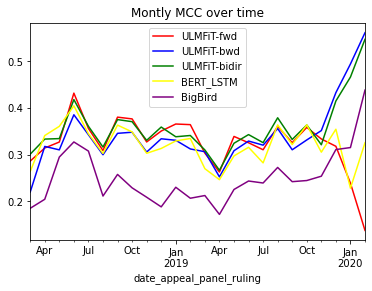

In [60]:
pd.DataFrame(columns=results_data['ULMFiT-fwd-test'].columns)


for k, v in results_data.items():
    if k.endswith('-test'):
        #print(k)
        df = v.copy()
        df.set_index('date_appeal_panel_ruling', inplace=True)
        df = df[df.index <= datetime(2020, 3, 1)]
        if ax is None:
            ax = df.resample('1M').apply(calculate_mcc_over_resample).plot(color=colors[k], label=k.split('-test')[0])
        else:
            df.resample('1M').apply(calculate_mcc_over_resample).plot(color=colors[k], label=k.split('-test')[0])
plt.legend()
plt.title('Montly MCC over time')
plt.show()



In [61]:
tmp_df.model.value_counts()

ULMFiT-bwd      76299
BERT_LSTM       76299
BigBird         76299
ULMFiT-fwd      76299
ULMFiT-bidir    76299
Name: model, dtype: int64

In [62]:
all_results = tmp_df.copy()
all_results = all_results.groupby('model').resample('1M').apply(calculate_mcc_over_resample).T
all_results = all_results.reset_index()
all_results.head()

model,date_appeal_panel_ruling,BERT_LSTM,BigBird,ULMFiT-bidir,ULMFiT-bwd,ULMFiT-fwd
0,2018-03-31,0.263873,0.184915,0.300867,0.219757,0.286087
1,2018-04-30,0.340834,0.204265,0.333275,0.317537,0.314103
2,2018-05-31,0.360633,0.294736,0.334292,0.310169,0.326973
3,2018-06-30,0.404509,0.327110,0.417930,0.385426,0.431759
4,2018-07-31,0.344893,0.307545,0.360723,0.342587,0.356148


In [63]:
all_results.columns = ['date_appeal_panel_ruling', 'BERT_LSTM', 'BigBird', 'ULMFiT-bidir', 'ULMFiT-bwd', 'ULMFiT-fwd']

In [64]:
all_results_ts = pd.DataFrame(columns=['date_appeal_panel_ruling', 'mcc', 'architecture'])

mapped_names = {
    'BERT_LSTM': 'BERT + LSTM', 
    'BigBird': 'BigBird',
    'ULMFiT-bidir': 'ULMFiT bidirectional', 
    'ULMFiT-bwd': 'ULMFiT backward', 
    'ULMFiT-fwd': 'ULMFiT forward'
}
for arch in ['BERT_LSTM', 'BigBird', 'ULMFiT-bidir', 'ULMFiT-bwd', 'ULMFiT-fwd']:
    _ = all_results[['date_appeal_panel_ruling', arch]]
    _.columns = ['date_appeal_panel_ruling','mcc']
    _['architecture'] = arch
    all_results_ts = all_results_ts.append(_)

all_results_ts.architecture = all_results_ts.architecture.map(mapped_names)

all_results_ts['date_appeal_panel_ruling'] = pd.to_datetime(all_results_ts['date_appeal_panel_ruling'])
all_results_ts = all_results_ts[all_results_ts['date_appeal_panel_ruling'] < datetime(2020, 4, 1)]

<ipython-input-64-f808a78d279f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _['architecture'] = arch


In [65]:
all_results_ts

,date_appeal_panel_ruling,mcc,architecture
0,2018-03-31,0.263873,BERT + LSTM
1,2018-04-30,0.340834,BERT + LSTM
2,2018-05-31,0.360633,BERT + LSTM
3,2018-06-30,0.404509,BERT + LSTM
4,2018-07-31,0.344893,BERT + LSTM
...,...,...,...
20,2019-11-30,0.333511,ULMFiT forward
21,2019-12-31,0.317822,ULMFiT forward
22,2020-01-31,0.238829,ULMFiT forward
23,2020-02-29,0.137535,ULMFiT forward


In [66]:
fig = px.line(all_results_ts, y='mcc', x='date_appeal_panel_ruling', color='architecture', color_discrete_sequence=px.colors.qualitative.Vivid, template="simple_white")
fig.update_layout(legend_title_text='Architecture')
fig.update_xaxes(title_text='Time')
fig.update_layout(title_text='Monthly MCC on the test dataset', title_x=0.5)

fig.update_yaxes(title_text='Matthews Correlation Coefficient')
fig.write_image("../figures/mcc_over_time.png")

In [67]:
all_results_ts.sort_values(by='mcc').tail(50)

,date_appeal_panel_ruling,mcc,architecture
20,2019-11-30,0.333511,ULMFiT forward
9,2018-12-31,0.333911,ULMFiT backward
2,2018-05-31,0.334292,ULMFiT bidirectional
11,2019-02-28,0.334534,BERT + LSTM
10,2019-01-31,0.338254,ULMFiT bidirectional
14,2019-05-31,0.338948,ULMFiT forward
1,2018-04-30,0.340834,BERT + LSTM
11,2019-02-28,0.340959,ULMFiT bidirectional
4,2018-07-31,0.342587,ULMFiT backward
15,2019-06-30,0.342884,ULMFiT bidirectional
